In [2]:
import os
import pandas as pd
import glob
import numpy as np
import xarray as xr
from scipy.ndimage import rotate

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import time
import cartopy.crs as ccrs
import cartopy


# Orography

In [52]:
mountains=[([106,110,10,18],"Annamite range (Vietnam)",60),
           ([73,78,9,17],"Western Ghats",70),
           ([360-79,360-68,-17,-9],"Central Andes",45),
           ([80,90,25,35],"Himalaya",10),
           ([95,106,-6,6],"Bukit Barisan (Sumatra)",45),
           ([135,150,-11,-1],"New Guinea highlands",10)
          ]

In [53]:
orog = xr.open_dataset("/global/cfs/projectdirs/m3522/cmip6/ERA5/e5.oper.invariant/197901/e5.oper.invariant.128_129_z.ll025sc.1979010100_1979010100.nc")
landmask = xr.open_dataset("/global/cfs/projectdirs/m3522/cmip6/ERA5/e5.oper.invariant/197901/e5.oper.invariant.128_172_lsm.ll025sc.1979010100_1979010100.nc").LSM
orogm = orog.Z.isel(time=0)/9.80665

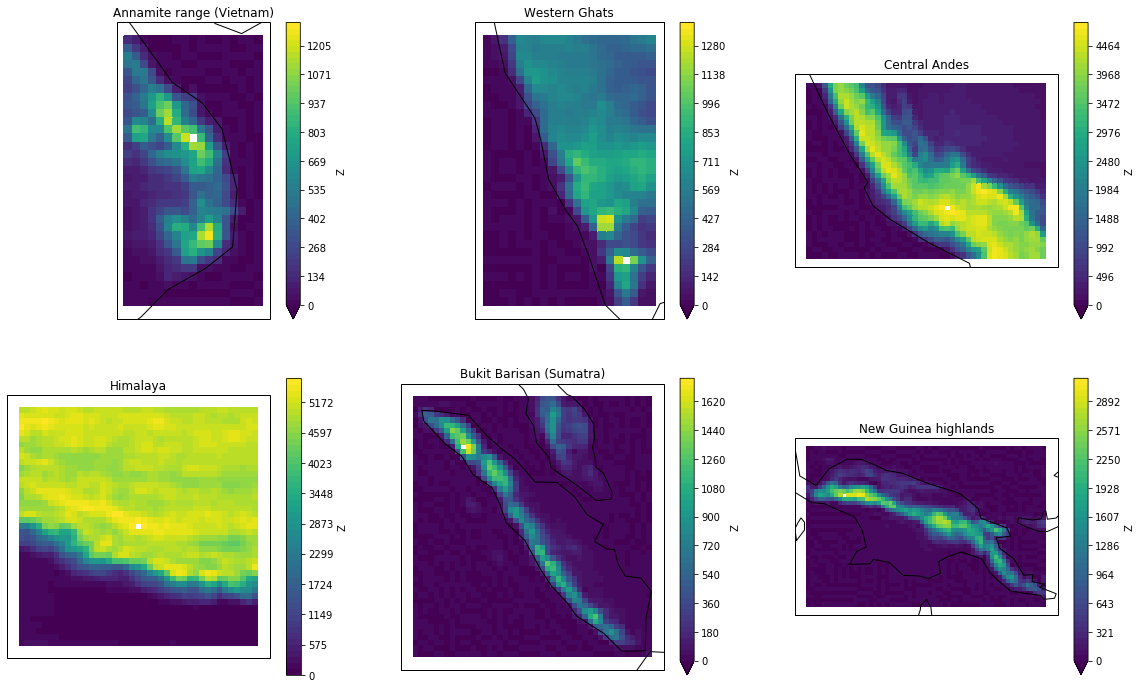

In [54]:
mountaindata = []
_,ax = plt.subplots(2,3,figsize=(20,12),subplot_kw={"projection":ccrs.PlateCarree()})
ax = ax.reshape(-1)
for i,(lonlat,name,_) in enumerate(mountains):
    ax[i].coastlines()
    window=orogm.sel(longitude=slice(lonlat[0],lonlat[1]),latitude=slice(lonlat[3],lonlat[2]))
    mountaindata.append(np.array(window))
    window.plot(ax=ax[i],transform=ccrs.PlateCarree(),cmap=plt.cm.viridis,levels=np.linspace(0,window.max()))
    ax[i].set_title(name)


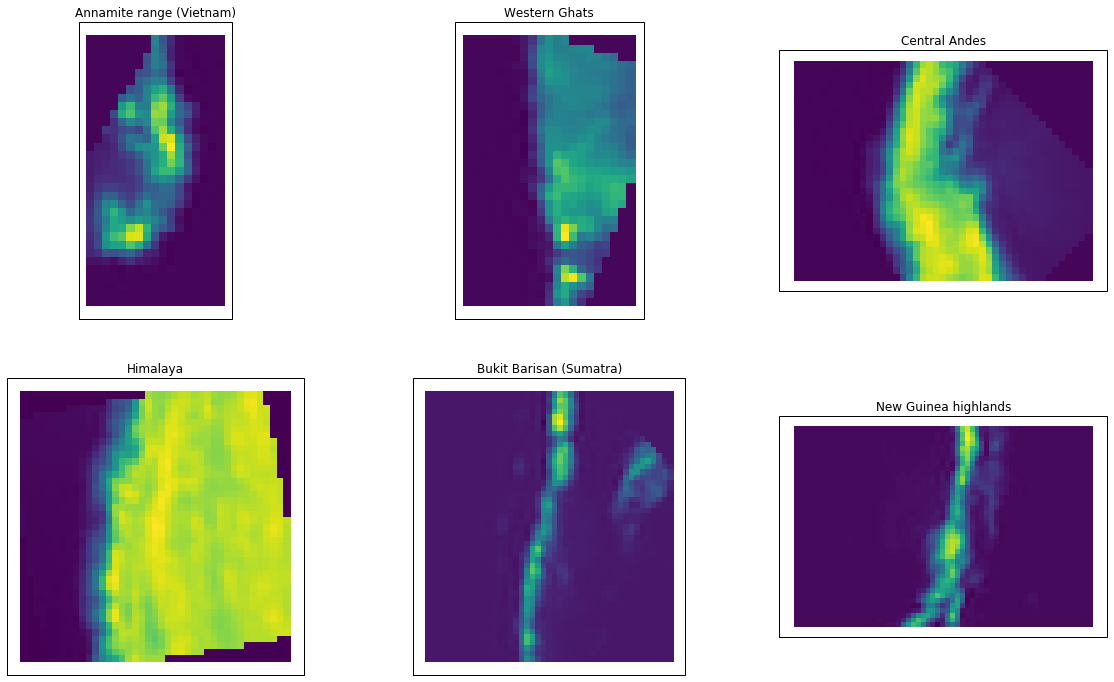

In [55]:
_,ax = plt.subplots(2,3,figsize=(20,12),subplot_kw={"projection":ccrs.PlateCarree()})
ax = ax.reshape(-1)
for i,(lonlat,name,angle) in enumerate(mountains):
    window = mountaindata[i]
    ax[i].set_title(name)
    #ax[i].pcolormesh(window[::-1],cmap=plt.cm.viridis)#,levels=np.linspace(0,window.max()))

    ax[i].pcolormesh(rotate(window[::-1],90-angle,reshape=False),cmap=plt.cm.viridis)#,levels=np.linspace(0,window.max()))



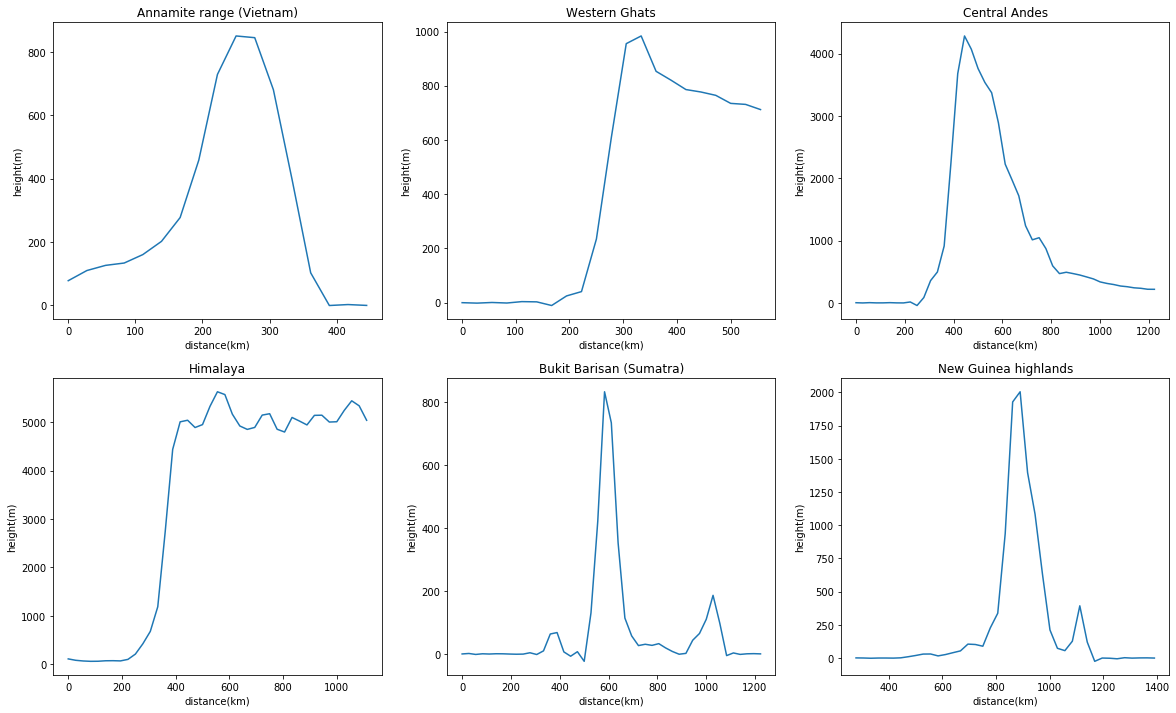

In [56]:
km_per_degreelat = 6370*np.pi/180
_,ax = plt.subplots(2,3,figsize=(20,12))
ax = ax.reshape(-1)
for i,(lonlat,name,angle) in enumerate(mountains):
    window = mountaindata[i]
    ax[i].set_title(name)
    #ax[i].pcolormesh(window[::-1],cmap=plt.cm.viridis)#,levels=np.linspace(0,window.max()))
    window_rot = rotate(window[::-1],90-angle,reshape=False,cval=np.nan)
    n,m=window_rot.shape
    ax[i].plot(np.arange(0,10000,0.25*km_per_degreelat)[:m],window_rot[n//2,:])
    ax[i].set_xlabel("distance(km)")
    ax[i].set_ylabel("height(m)")


In [28]:
window = mountaindata[i]
window_rot = rotate(window[::-1],90-angle)
print(window.shape,window_rot.shape)

(49, 45) (66, 66)
